In [1]:
import sys
sys.path.append("../src")

In [2]:
from preprocess import load_customer_data, clean_customer_data

In [3]:
df_raw = load_customer_data("../data/customer_profiles.csv")
df_raw.head()

✅ Loaded data with shape: (5, 5)


Customer_ID   Age  Gender     Location  Total_Spend
0        C001  34.0    Male     New York      1200.50
1        C002  28.0  Female          NaN       830.00
2        C003   NaN  Female  Los Angeles       950.75
3        C004  45.0    Male      Chicago          NaN
4        C005  31.0     NaN      Seattle       720.10

In [4]:
df_clean = clean_customer_data(df_raw)
df_clean

✅ Cleaned data with shape: (5, 5)


customer_id   age   gender     location  total_spend
0        C001  34.0     Male     New York     1200.500
1        C002  28.0   Female      Unknown      830.000
2        C003  32.5   Female  Los Angeles      950.750
3        C004  45.0     Male      Chicago      890.375
4        C005  31.0  Unknown      Seattle      720.100

In [5]:
import sys
sys.path.append("../src")

In [6]:
from embeddings import get_numeric_features, scale_features, generate_pca_embeddings, plot_pca_embeddings

In [7]:
# 👇 Extract + scale numeric features
df_numeric = get_numeric_features(df_clean)
df_scaled = scale_features(df_numeric)

In [8]:
# 👇 Generate PCA embeddings
df_pca = generate_pca_embeddings(df_scaled, n_components=2)

✅ Explained variance ratio: [0.58263819 0.41736181]


/home/sagemaker-user/audience-vector-builder/notebooks/../src/embeddings.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca["PC1"], df_pca["PC2"], c=labels, cmap='viridis', edgecolor='k')


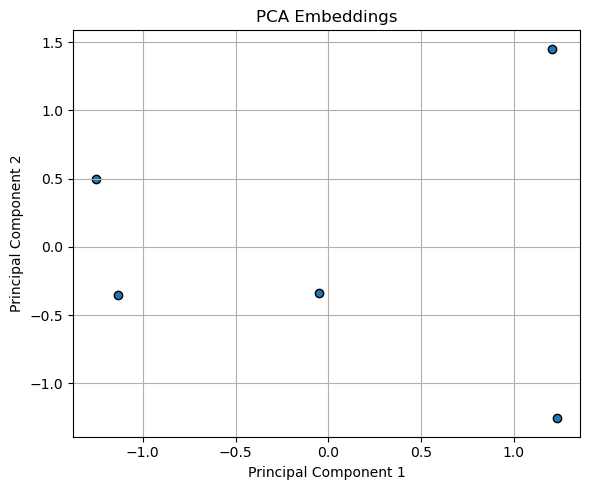

In [9]:
# 👇 Plot the result
plot_pca_embeddings(df_pca)

In [11]:
import pandas as pd

In [12]:
df_with_embeddings = pd.concat([df_clean.reset_index(drop=True), df_pca], axis=1)
df_with_embeddings

customer_id   age   gender     location  total_spend       PC1       PC2
0        C001  34.0     Male     New York     1200.500  1.232100 -1.256483
1        C002  28.0   Female      Unknown      830.000 -1.133279 -0.354084
2        C003  32.5   Female  Los Angeles      950.750 -0.052159 -0.337969
3        C004  45.0     Male      Chicago      890.375  1.205527  1.452220
4        C005  31.0  Unknown      Seattle      720.100 -1.252188  0.496316

In [13]:
from clustering import perform_kmeans, compute_cosine_similarity_matrix, find_top_similar_users

In [14]:
# 👇 Perform KMeans clustering
df_with_embeddings['Cluster'] = perform_kmeans(df_pca, n_clusters=3)

In [15]:
# 👇 Compute cosine similarity between users
similarity_matrix = compute_cosine_similarity_matrix(df_pca)

In [16]:
# 👇 Get top-3 similar users for user at index 0
top_similar = find_top_similar_users(similarity_matrix, user_index=0, top_n=3)
top_similar

2    0.598856
3   -0.102174
1   -0.455353
Name: 0, dtype: float64

In [17]:
df_with_embeddings

customer_id   age   gender  ...       PC1       PC2  Cluster
0        C001  34.0     Male  ...  1.232100 -1.256483        2
1        C002  28.0   Female  ... -1.133279 -0.354084        0
2        C003  32.5   Female  ... -0.052159 -0.337969        0
3        C004  45.0     Male  ...  1.205527  1.452220        1
4        C005  31.0  Unknown  ... -1.252188  0.496316        0

[5 rows x 8 columns]

In [18]:
similarity_matrix

0         1         2         3         4
0  1.000000 -0.455353  0.598856 -0.102174 -0.913971
1 -0.455353  1.000000  0.440320 -0.839126  0.777450
2  0.598856  0.440320  1.000000 -0.857853 -0.222365
3 -0.102174 -0.839126 -0.857853  1.000000 -0.310273
4 -0.913971  0.777450 -0.222365 -0.310273  1.000000

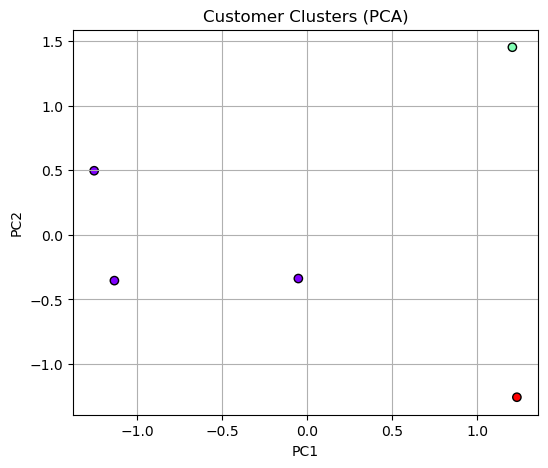

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(df_with_embeddings['PC1'], df_with_embeddings['PC2'],
            c=df_with_embeddings['Cluster'], cmap='rainbow', edgecolor='k')
plt.title("Customer Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [39]:
import importlib
import visualize
importlib.reload(visualize)

from visualize import plot_umap, plot_tsne, plot_cluster_distribution, plot_radar_chart

/opt/conda/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/conda/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


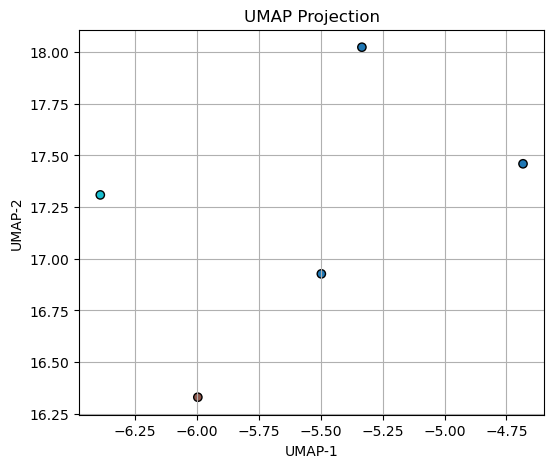

In [30]:
# 👇 UMAP projection
plot_umap(df_pca, labels=df_with_embeddings['Cluster'])

test


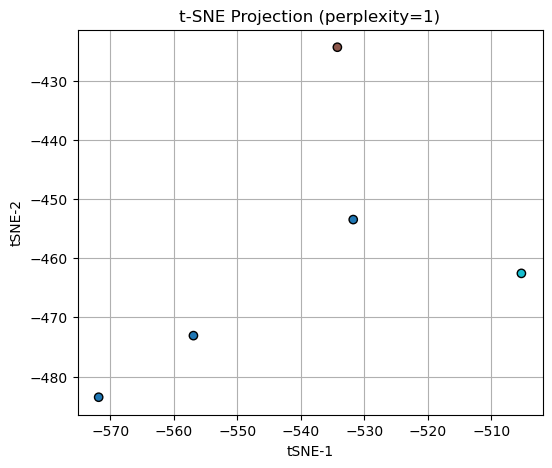

In [36]:
# 👇 t-SNE projection
plot_tsne(df_pca, labels=df_with_embeddings['Cluster'])

/home/sagemaker-user/audience-vector-builder/notebooks/../src/visualize.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_with_clusters, palette='pastel')


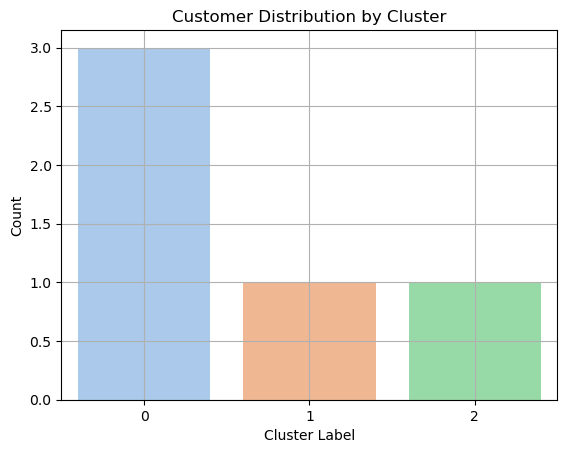

In [37]:
plot_cluster_distribution(df_with_embeddings)

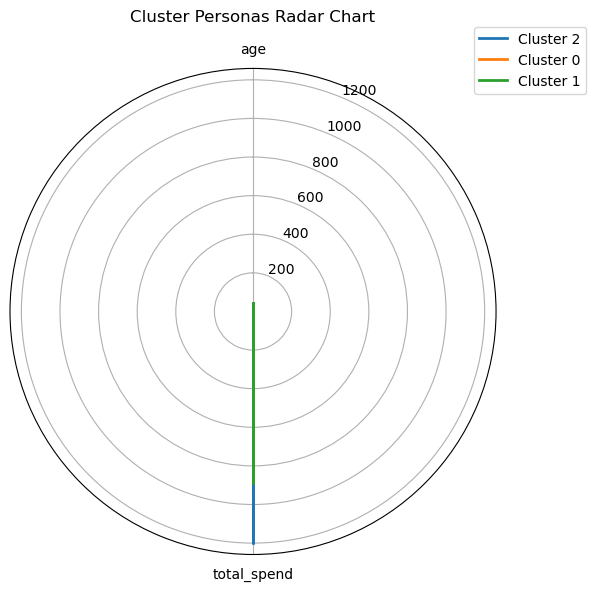

In [40]:
# Select numeric columns you want to profile
numeric_features = ['age', 'total_spend']

# Plot radar chart
plot_radar_chart(df_with_embeddings, cluster_col='Cluster', numeric_cols=numeric_features)